## Observations and Insights 

# Guidelines for Project 1

This document contains guidelines, requirements, and suggestions for Project 1.

## Team Effort

Before anything, remember that Projects are a **group effort**: Working closely with your teammates is a requirement. This both helps teach real-world collaborative workflows, and enables you to tackle more difficult problems than you'd be able to working alone.

In other words, working in groups allows you to **work smart** and **dream big**. Take advantage of it!

## Project Proposal

Before you start writing any code, your group should outline the scope and purpose of your project. This helps provide direction and prevent [scope creep](https://en.wikipedia.org/wiki/Scope_creep).

Write this as a brief summary of your interests and intent, including:

* The kind of data you'd like to work with/field you're interested in (e.g., geodata, weather data, etc.)

* The kinds of questions you'll be asking of that data

* Possible source for such data

In other words, write down what kind of data you plan to work with, and what kinds of questions you'd like to ask of it. This constitutes your Project Proposal/Outline, and should look something like this:

> Our project is to uncover patterns in criminal activity around Los Angeles. We'll examine relationships between types of crime and location; crime rates and times of day; trends in crime rates over the course of the year; and related questions, as the data admits.

## Finding Data

Once your group has written an outline, it's time to start hunting for data. You are free to use data from any source, but we recommend the following curated sources of high-quality data:

* [data.world](https://data.world/)

* [Kaggle](https://www.kaggle.com/)

* [Data.gov](https://www.data.gov)

* [Public APIs](https://github.com/abhishekbanthia/Public-APIs)

* [Awesome-APIs List](https://github.com/Kikobeats/awesome-api)

* [Medium APIs List](https://medium.com/@benjamin_libor/a-curated-collection-of-over-150-apis-to-build-great-products-fdcfa0f361bc)

Chances are you'll have to update your Project Outline as you explore the available data. **This is fine**—adjustments like this are part of the process! Just make sure everyone in the group is up-to-speed on the goals of the project as you make changes.

Make sure that your data is not too large for local analysis. **Big Data** datasets are difficult to manage locally, so consider a subset of that data or a different dataset altogether.

## Data Cleanup & Analysis

With data in hand, it's time to tackle development and analysis. This is where the fun starts!

Inevitably, the analysis process can be broken into two broad phases: **Exploration & Cleanup** and **Analysis** proper.

As you've learned, you'll need to explore, clean, and reformat your data before you can begin to answer your research questions. We recommend keeping track of these exploration and cleanup steps in a dedicated Jupyter Notebook, both for organization's sake and to make it easier to  present your work later.

Similarly, after you've massaged your data and are ready to start crunching numbers, you should keep track of your work in a Jupyter Notebook dedicated specifically to analysis.

During both phases, **don't forget to include plots**! Don't make the mistake of waiting to build figures until you're preparing your presentation. Creating them along the way can reveal insights and interesting trends in the data that you might not notice otherwise.

We recommend focusing your analysis on techniques such as aggregation, correlation, comparison, summary statistics, sentiment analysis, and time series analysis.

Finally, be sure that your projects meet the [technical requirements](TechnicalRequirements.md).

## Presentation

After you've analyzed your data to your satisfaction, you'll put together a presentation to show off your work, explain your process, and discuss your conclusions.

This presentation will be delivered as a slideshow, and should give your classmates and instructional staff an overview of your work. PowerPoint, Keynote, and Google Slides are all acceptable for building slides.

As long as your slides meet the [presentation requirements](PresentationRequirements.md), you are free to structure the presentation however you wish, but students are often successful with the format laid out in the [presentation guidelines](PresentationGuidelines.md).

- - -

### Copyright

Coding Boot Camp © 2017. All Rights Reserved.


# Technical Requirements

The technical requirements for Project 1 are as follows.

* [ ] Use Pandas to clean and format your data set(s)

* [ ] Create a Jupyter Notebook describing the **data exploration and cleanup** process

* [ ] Create a Jupyter Notebook illustrating the **final data analysis**

* [ ] Use Matplotlib to create a total of 6-8 visualizations of your data (ideally, at least 2 per "question" you ask of your data)

* [ ] Save PNG images of your visualizations to distribute to the class and instructional team, and for inclusion in your presentation

* [ ] Optionally, use at least one API, if you can find an API with data pertinent to your primary research questions

* [ ] Create a write-up summarizing your major findings. This should include a heading for each "question" you asked of your data, and under each heading, a short description of what you found and any relevant plots.

- - -

### Copyright

Coding Boot Camp © 2017. All Rights Reserved.


In [1]:
! pip install census

In [2]:
# Install gmaps
! pip install gmaps

In [3]:
# enable nbextension for gmaps
! jupyter nbextension enable --py gmaps

Enabling notebook extension jupyter-gmaps/extension...
      - Validating: ok


In [4]:
# enable extenstion for widgets
! jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [5]:
! jupyter nbextension list

Known nbextensions:
  config dir: C:\Users\anand\.jupyter\nbconfig
    notebook section
      jupyter-gmaps/extension enabled 
      jupyter-js-widgets/extension enabled 
  config dir: C:\Users\anand\.conda\envs\PythonData\etc\jupyter\nbconfig
    notebook section
      jupyter-js-widgets/extension enabled 
      jupyter-gmaps/extension enabled 


      - Validating: ok
      - Validating: ok
      - Validating: ok
      - Validating: ok


In [6]:
# Install citipy
! pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import json
import requests
from census import Census
import csv
import os
import datetime
import gmaps
from citipy import citipy

# Import API key
from config import api_key, g_key

In [8]:
# Census API Key
c = Census(api_key, year=2017)

In [9]:
#### Run Census Search to retrieve data on all zip codes (2017 ACS5 Census)
# See: https://github.com/CommerceDataService/census-wrapper for library documentation
# See: https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b for labels
census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E",
                          "B17001_002E"), {'for': 'zip code tabulation area:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "NAME": "Name", "zip code tabulation area": "Zipcode"})

# Add in Poverty Rate (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * \
    census_pd["Poverty Count"].astype(
        int) / census_pd["Population"].astype(int)

# Final DataFrame
census_pd = census_pd[["Zipcode", "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Poverty Rate"]]

# Visualize
print(len(census_pd))
census_pd.head()

33120


,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,00601,17599.0,38.9,11757.0,7041.0,11282.0,64.105915
1,00602,39209.0,40.9,16190.0,8978.0,20428.0,52.100283
2,00603,50135.0,40.4,16645.0,10897.0,25176.0,50.216416
3,00606,6304.0,42.8,13387.0,5960.0,4092.0,64.911168
4,00610,27590.0,41.4,18741.0,9266.0,12553.0,45.498369


In [10]:
census_pd = census_pd.dropna(how='any')
census_pd = census_pd[census_pd["Household Income"]>=0]

In [11]:
us_counties_df = pd.read_csv("../PyCovid19/data/us_counties_nyt.csv")

us_counties_df["county and state"] = us_counties_df["county"].str.cat(us_counties_df["state"], sep=" ")

us_counties_df = us_counties_df[us_counties_df["date"] == "2020-09-27"]

us_counties_df.head()

,date,county,state,fips,cases,deaths,county and state
573338,2020-09-27,Autauga,Alabama,1001.0,1773,25,Autauga Alabama
573339,2020-09-27,Baldwin,Alabama,1003.0,5526,50,Baldwin Alabama
573340,2020-09-27,Barbour,Alabama,1005.0,885,7,Barbour Alabama
573341,2020-09-27,Bibb,Alabama,1007.0,656,10,Bibb Alabama
573342,2020-09-27,Blount,Alabama,1009.0,1617,15,Blount Alabama


In [12]:
# Create a Group by data set of counties

grouped_us_counties = us_counties_df.groupby(
                        ["county", "state", "county and state"], as_index=False).agg({
                                                             "cases": ["sum"],
                                                             "deaths": ["sum"]
                                                             }
                                                            )

# Assign column header names
grouped_us_counties.columns = ["County", "State", "County and State", "Cases", "Deaths"]

# Display to output
grouped_us_counties

,County,State,County and State,Cases,Deaths
0,Abbeville,South Carolina,Abbeville South Carolina,579,12
1,Acadia,Louisiana,Acadia Louisiana,2962,97
2,Accomack,Virginia,Accomack Virginia,1175,19
3,Ada,Idaho,Ada Idaho,12720,147
4,Adair,Iowa,Adair Iowa,72,1
...,...,...,...,...,...
3239,Yuma,Arizona,Yuma Arizona,12695,345
3240,Yuma,Colorado,Yuma Colorado,114,1
3241,Zapata,Texas,Zapata Texas,333,6
3242,Zavala,Texas,Zavala Texas,367,16


In [13]:

zip2county_df  = pd.read_csv('../PyCovid19/data/zip_code_county_and_states.csv')

zip2county_df.head()


zip2county_df["county and state"] = zip2county_df["county"].str.cat(zip2county_df["state"], sep=" ")

zip2county_df.columns = ["State Fips","State","State Code",
                                      "Zipcode", "County",
                                      "City", "County and State"
                                     ]

zip2county_df.head()

,State Fips,State,State Code,Zipcode,County,City,County and State
0,1,Alabama,AL,35004,St. Clair,Acmar,St. Clair Alabama
1,1,Alabama,AL,35005,Jefferson,Adamsville,Jefferson Alabama
2,1,Alabama,AL,35006,Jefferson,Adger,Jefferson Alabama
3,1,Alabama,AL,35007,Shelby,Keystone,Shelby Alabama
4,1,Alabama,AL,35010,Tallapoosa,New site,Tallapoosa Alabama


In [14]:
# read in text file
zip_codes_states = '../PyCovid19/data/zip_codes_states.csv'
# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
county_locations_df = pd.read_csv(zip_codes_states)

county_locations_df.drop("zip_code", axis=1, inplace=True)
county_locations_df.drop("city", axis=1, inplace=True)
county_locations_df = county_locations_df.dropna(how='any')
county_locations_df = county_locations_df.drop_duplicates(keep='first')
county_locations_df.columns = ["Latitude", "Longitude", "State Code", "County"]
county_locations_df.head()

#county_locations_df[county_locations_df["State"] == "AK"]

,Latitude,Longitude,State Code,County
0,40.922326,-72.637078,NY,Suffolk
2,18.165273,-66.722583,PR,Adjuntas
3,18.393103,-67.180953,PR,Aguada
4,18.455913,-67.145780,PR,Aguadilla
5,18.493520,-67.135883,PR,Aguadilla


In [15]:
# Create a data frame of complete economic data, county, state, fips, cases, deaths

census_pd_at_county_df = pd.merge( census_pd, zip2county_df, how="inner", on=["Zipcode"])

census_pd_with_county_df= census_pd_at_county_df.groupby(
                        ["County","State","State Code","County and State"], as_index=False).agg({
                                                         "Population": ["sum"],
                                                         "Median Age": ["mean"],
                                                         "Household Income": ["mean"],
                                                         "Per Capita Income": ["mean"],
                                                         "Poverty Count": ["sum"],
                                                         "Poverty Rate": ["mean"]
                                                         }
                                                        )

# Assign column header names
census_pd_with_county_df.columns = ["County", "State","State Code","County and State",
                                      "Population", "Median Age",
                                      "Household Income", "Per Capita Income",
                                       "Poverty Count", "Poverty Rate"
                                     ]

# Display to output
census_pd_with_county_df.head()


,County,State,State Code,County and State,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,Abbeville,South carolina,SC,Abbeville South carolina,20427.0,39.040000,35998.400000,18422.200000,4765.0,23.813052
1,Acadia Parish,Louisiana,LA,Acadia Parish Louisiana,61613.0,34.577778,40353.222222,21836.444444,13354.0,16.363707
2,Accomack,Virginia,VA,Accomack Virginia,29555.0,47.895238,43181.714286,24031.619048,5356.0,16.040186
3,Ada,Idaho,ID,Ada Idaho,379413.0,37.500000,61637.571429,33507.357143,45649.0,11.744906
4,Adair,Iowa,IA,Adair Iowa,5979.0,46.000000,49269.800000,28462.800000,597.0,11.178799


In [16]:
complete_data_us_df = pd.merge( census_pd_with_county_df, pd.DataFrame(grouped_us_counties),
                                             how="inner", on=["County","State"])
# Display to output
complete_data_us_df.head()

#complete_data_us_df[complete_data_us_df["State"] == "Alaska"].head()

,County,State,State Code,County and State_x,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,County and State_y,Cases,Deaths
0,Accomack,Virginia,VA,Accomack Virginia,29555.0,47.895238,43181.714286,24031.619048,5356.0,16.040186,Accomack Virginia,1175,19
1,Ada,Idaho,ID,Ada Idaho,379413.0,37.500000,61637.571429,33507.357143,45649.0,11.744906,Ada Idaho,12720,147
2,Adair,Iowa,IA,Adair Iowa,5979.0,46.000000,49269.800000,28462.800000,597.0,11.178799,Adair Iowa,72,1
3,Adair,Kentucky,KY,Adair Kentucky,18136.0,40.566667,32746.666667,17338.666667,3561.0,28.275472,Adair Kentucky,317,19
4,Adair,Missouri,MO,Adair Missouri,25482.0,39.040000,43051.200000,22065.400000,5920.0,19.738530,Adair Missouri,350,0


In [17]:
print(complete_data_us_df[complete_data_us_df["Household Income"] < 0])

Empty DataFrame
Columns: [County, State, State Code, County and State_x, Population, Median Age, Household Income, Per Capita Income, Poverty Count, Poverty Rate, County and State_y, Cases, Deaths]
Index: []


In [18]:
#print(complete_data_us_df[complete_data_us_df["State"] == "California"])

In [19]:
complete_data_us_county_df = complete_data_us_df

complete_data_us_county_df = complete_data_us_county_df.drop(['County and State_y'], axis=1)

complete_data_us_county_df.head()

# Assign column header names
complete_data_us_county_df.columns = ["County", "State","State Code","County and State",
                                      "Population", "Median Age",
                                      "Household Income", "Per Capita Income",
                                       "Poverty Count", "Poverty Rate",
                                      "Cases","Morbidity",
                                     ]

#complete_data_us_county_df["Household Income"] = complete_data_us_county_df["Household Income"].map("{:,.2f}".format)
#complete_data_us_county_df["Per Capita Income"] = complete_data_us_county_df["Per Capita Income"].map("{:,.2f}".format)
#complete_data_us_county_df["Population"] = complete_data_us_county_df["Population"].map("{:,.0f}".format)
#complete_data_us_county_df["Poverty Rate"] = complete_data_us_county_df["Poverty Rate"].map("{:,.2f}".format)


# Population should be integer
# Use two decimal places for income

# Display to output
complete_data_us_county_df.head()

,County,State,State Code,County and State,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Cases,Morbidity
0,Accomack,Virginia,VA,Accomack Virginia,29555.0,47.895238,43181.714286,24031.619048,5356.0,16.040186,1175,19
1,Ada,Idaho,ID,Ada Idaho,379413.0,37.500000,61637.571429,33507.357143,45649.0,11.744906,12720,147
2,Adair,Iowa,IA,Adair Iowa,5979.0,46.000000,49269.800000,28462.800000,597.0,11.178799,72,1
3,Adair,Kentucky,KY,Adair Kentucky,18136.0,40.566667,32746.666667,17338.666667,3561.0,28.275472,317,19
4,Adair,Missouri,MO,Adair Missouri,25482.0,39.040000,43051.200000,22065.400000,5920.0,19.738530,350,0


In [20]:
complete_data_us_df.head()

,County,State,State Code,County and State_x,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,County and State_y,Cases,Deaths
0,Accomack,Virginia,VA,Accomack Virginia,29555.0,47.895238,43181.714286,24031.619048,5356.0,16.040186,Accomack Virginia,1175,19
1,Ada,Idaho,ID,Ada Idaho,379413.0,37.500000,61637.571429,33507.357143,45649.0,11.744906,Ada Idaho,12720,147
2,Adair,Iowa,IA,Adair Iowa,5979.0,46.000000,49269.800000,28462.800000,597.0,11.178799,Adair Iowa,72,1
3,Adair,Kentucky,KY,Adair Kentucky,18136.0,40.566667,32746.666667,17338.666667,3561.0,28.275472,Adair Kentucky,317,19
4,Adair,Missouri,MO,Adair Missouri,25482.0,39.040000,43051.200000,22065.400000,5920.0,19.738530,Adair Missouri,350,0


In [21]:
complete_data_us_state_df = complete_data_us_df.groupby(
                        ["State"], as_index=False).agg({ "Cases": ["sum"],
                                                         "Deaths": ["sum"],
                                                         "Population": ["sum"],
                                                         "Median Age": ["mean"],
                                                         "Household Income": ["mean"],
                                                         "Per Capita Income": ["mean"],
                                                         "Poverty Count": ["sum"],
                                                         "Poverty Rate": ["mean"]
                                                         }
                                                        )

# Assign column header names
complete_data_us_state_df.columns = ["State","Cases","Morbidity",
                                      "Population", "Median Age",
                                      "Household Income", "Per Capita Income",
                                       "Poverty Count", "Poverty Rate"
                                     ]

complete_data_us_state_df["Cases"] = complete_data_us_state_df["Cases"].astype(float)
complete_data_us_state_df["Cases"] = complete_data_us_state_df["Cases"].apply(np.floor)
complete_data_us_state_df["Morbidity"] = complete_data_us_state_df["Morbidity"].astype(float)
complete_data_us_state_df["Morbidity"] = complete_data_us_state_df["Morbidity"].apply(np.floor)
complete_data_us_state_df["Population"] = complete_data_us_state_df["Population"].astype(float)
complete_data_us_state_df["Population"] = complete_data_us_state_df["Population"].apply(np.floor)
complete_data_us_state_df["Household Income"] = complete_data_us_state_df["Household Income"].astype(float)
complete_data_us_state_df["Household Income"] = complete_data_us_state_df["Household Income"].apply(np.floor)
#complete_data_us_state_df["Population"] = complete_data_us_state_df["Population"].map("{:.0f}".format)
complete_data_us_state_df["Median Age"] = complete_data_us_state_df["Median Age"].astype(float)
complete_data_us_state_df["Median Age"] = complete_data_us_state_df["Median Age"].apply(np.floor)
complete_data_us_state_df["Per Capita Income"] = complete_data_us_state_df["Per Capita Income"].astype(float)
complete_data_us_state_df["Per Capita Income"] = complete_data_us_state_df["Per Capita Income"].apply(np.floor)
complete_data_us_state_df["Poverty Count"] = complete_data_us_state_df["Poverty Count"].apply(np.floor)

#complete_data_us_state_df["Poverty Count"] = complete_data_us_state_df["Poverty Count"].map("{:.0f}".format)

# Display to output
complete_data_us_state_df.head()

,State,Cases,Morbidity,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,Alabama,152321.0,2502.0,4830489.0,42.0,40713.0,22244.0,846962.0,20.385602
1,Alaska,3419.0,17.0,369593.0,36.0,57749.0,27253.0,41488.0,17.097559
2,Arizona,217236.0,5623.0,5797196.0,45.0,43728.0,23168.0,1019301.0,19.907758
3,Arkansas,79470.0,1308.0,2913215.0,43.0,39240.0,21000.0,517554.0,19.405914
4,California,811698.0,15608.0,38019919.0,43.0,62474.0,32090.0,5671248.0,15.199278


In [22]:
print(complete_data_us_county_df[complete_data_us_county_df["County"] == "Abbeville"])

Empty DataFrame
Columns: [County, State, State Code, County and State, Population, Median Age, Household Income, Per Capita Income, Poverty Count, Poverty Rate, Cases, Morbidity]
Index: []


In [23]:
# Get the reporting date as today's date
reporting_date = pd.to_datetime('today').strftime('%m/%d/%y')

print(reporting_date)

10/07/20


In [24]:
complete_data_us_county_df.head()

,County,State,State Code,County and State,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Cases,Morbidity
0,Accomack,Virginia,VA,Accomack Virginia,29555.0,47.895238,43181.714286,24031.619048,5356.0,16.040186,1175,19
1,Ada,Idaho,ID,Ada Idaho,379413.0,37.500000,61637.571429,33507.357143,45649.0,11.744906,12720,147
2,Adair,Iowa,IA,Adair Iowa,5979.0,46.000000,49269.800000,28462.800000,597.0,11.178799,72,1
3,Adair,Kentucky,KY,Adair Kentucky,18136.0,40.566667,32746.666667,17338.666667,3561.0,28.275472,317,19
4,Adair,Missouri,MO,Adair Missouri,25482.0,39.040000,43051.200000,22065.400000,5920.0,19.738530,350,0


In [25]:
county_locations_df.head()

,Latitude,Longitude,State Code,County
0,40.922326,-72.637078,NY,Suffolk
2,18.165273,-66.722583,PR,Adjuntas
3,18.393103,-67.180953,PR,Aguada
4,18.455913,-67.145780,PR,Aguadilla
5,18.493520,-67.135883,PR,Aguadilla


In [26]:
complete_data_us_location_df = pd.merge( complete_data_us_county_df, county_locations_df,
                                             how="inner", on=["County","State Code"] )

complete_data_us_location_df.head()


,County,State,State Code,County and State,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Cases,Morbidity,Latitude,Longitude
0,Accomack,Virginia,VA,Accomack Virginia,29555.0,47.895238,43181.714286,24031.619048,5356.0,16.040186,1175,19,37.712919,-75.661132
1,Accomack,Virginia,VA,Accomack Virginia,29555.0,47.895238,43181.714286,24031.619048,5356.0,16.040186,1175,19,37.865814,-75.527697
2,Accomack,Virginia,VA,Accomack Virginia,29555.0,47.895238,43181.714286,24031.619048,5356.0,16.040186,1175,19,37.896797,-75.520581
3,Accomack,Virginia,VA,Accomack Virginia,29555.0,47.895238,43181.714286,24031.619048,5356.0,16.040186,1175,19,37.567852,-75.858617
4,Accomack,Virginia,VA,Accomack Virginia,29555.0,47.895238,43181.714286,24031.619048,5356.0,16.040186,1175,19,37.823569,-75.615138


In [38]:

complete_data_us_location_df.columns = ["County",
                                        "State",
                                        "State Code",
                                        "County and State",
                                        "Population",
                                        "Median Age",
                                        "Household Income",
                                        "Per Capita Income",
                                        "Poverty Count",
                                        "Poverty Rate",
                                        "Cases",
                                        "Morbidity",                                        
                                        "Latitude",
                                        "Longitude"
                                        ]

complete_data_us_location_df["Cases"] = complete_data_us_location_df["Cases"].astype(float)
complete_data_us_location_df["Cases"] = complete_data_us_location_df["Cases"].apply(np.floor)
complete_data_us_location_df["Morbidity"] = complete_data_us_location_df["Morbidity"].astype(float)
complete_data_us_location_df["Morbidity"] = complete_data_us_location_df["Morbidity"].apply(np.floor)
complete_data_us_location_df["Population"] = complete_data_us_location_df["Population"].astype(float)
complete_data_us_location_df["Population"] = complete_data_us_location_df["Population"].apply(np.floor)
#complete_data_us_location_df["Population"] = complete_data_us_location_df["Population"].map("{:.0f}".format)
complete_data_us_location_df["Median Age"] = complete_data_us_location_df["Median Age"].astype(float)
complete_data_us_location_df["Median Age"] = complete_data_us_location_df["Median Age"].apply(np.floor)
complete_data_us_location_df["Household Income"] = complete_data_us_location_df["Household Income"].astype(float)
complete_data_us_location_df["Household Income"] = complete_data_us_location_df["Household Income"].apply(np.floor)
complete_data_us_location_df["Per Capita Income"] = complete_data_us_location_df["Per Capita Income"].astype(float)
complete_data_us_location_df["Per Capita Income"] = complete_data_us_location_df["Per Capita Income"].apply(np.floor)
complete_data_us_location_df["Poverty Count"] = complete_data_us_location_df["Poverty Count"].apply(np.floor)
#complete_data_us_location_df["Poverty Count"] = complete_data_us_location_df["Poverty Count"].map("{:.0f}".format)
complete_data_us_location_df["Latitude"] = complete_data_us_location_df["Latitude"].apply(np.floor)
complete_data_us_location_df["Longitude"] = complete_data_us_location_df["Longitude"].apply(np.floor)

#complete_data_us_state_df["Population"] = complete_data_us_state_df["Population"].map("{:,.0f}".format)


complete_data_us_location_df= complete_data_us_location_df.drop_duplicates(keep='first')
# Display to output
complete_data_us_location_df.head()

#complete_data_us_location_df[complete_data_us_location_df["State"] == "Alaska"]

,County,State,State Code,County and State,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Cases,Morbidity,Latitude,Longitude
0,Accomack,Virginia,VA,Accomack Virginia,29555.0,47.0,43181.0,24031.0,5356.0,16.040186,1175.0,19.0,37.0,-76.0
40,Ada,Idaho,ID,Ada Idaho,379413.0,37.0,61637.0,33507.0,45649.0,11.744906,12720.0,147.0,43.0,-117.0
51,Ada,Idaho,ID,Ada Idaho,379413.0,37.0,61637.0,33507.0,45649.0,11.744906,12720.0,147.0,43.0,-116.0
59,Adair,Iowa,IA,Adair Iowa,5979.0,46.0,49269.0,28462.0,597.0,11.178799,72.0,1.0,41.0,-95.0
64,Adair,Kentucky,KY,Adair Kentucky,18136.0,40.0,32746.0,17338.0,3561.0,28.275472,317.0,19.0,36.0,-86.0


In [39]:
# Configure gmaps with API key
gmaps.configure(api_key=g_key)

In [40]:
cases = complete_data_us_location_df["Cases"].to_list()

max_cases = complete_data_us_location_df["Cases"].max()

household_income = complete_data_us_location_df["Household Income"].to_list()

max_household_income = complete_data_us_location_df["Household Income"].max()

county_locations = complete_data_us_location_df[["Latitude", "Longitude"]]

In [41]:
# Create gmaps figure objects
fig = gmaps.figure(center=(40, -90), zoom_level=3.5)
cases_layer = gmaps.heatmap_layer(county_locations, weights=cases,
                                 max_intensity=max_cases,
                                 dissipating=False,
                                 point_radius=3)
fig.add_layer(cases_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [42]:
top_ten_counties_df = complete_data_us_location_df.sort_values(by="Cases", ascending = False).iloc[:15,:]

#top_ten_counties_df = complete_data_us_location_df.drop_duplicates(keep='last')

top_ten_counties_df

,County,State,State Code,County and State,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Cases,Morbidity,Latitude,Longitude
13122,Los Angeles,California,CA,Los Angeles California,10004486.0,37.0,69031.0,36034.0,1680793.0,15.380849,267801.0,6514.0,33.0,-119.0
13128,Los Angeles,California,CA,Los Angeles California,10004486.0,37.0,69031.0,36034.0,1680793.0,15.380849,267801.0,6514.0,34.0,-119.0
13154,Los Angeles,California,CA,Los Angeles California,10004486.0,37.0,69031.0,36034.0,1680793.0,15.380849,267801.0,6514.0,33.0,-118.0
14638,Miami-Dade,Florida,FL,Miami-Dade Florida,2702187.0,39.0,55448.0,30974.0,505085.0,17.886511,169425.0,3231.0,25.0,-81.0
4736,Cook,Illinois,IL,Cook Illinois,5033785.0,38.0,69639.0,38486.0,802926.0,13.748545,143634.0,5210.0,42.0,-88.0
4740,Cook,Illinois,IL,Cook Illinois,5033785.0,38.0,69639.0,38486.0,802926.0,13.748545,143634.0,5210.0,42.0,-89.0
4738,Cook,Illinois,IL,Cook Illinois,5033785.0,38.0,69639.0,38486.0,802926.0,13.748545,143634.0,5210.0,41.0,-88.0
8914,Harris,Texas,TX,Harris Texas,4507126.0,33.0,63826.0,33755.0,750616.0,17.213883,141353.0,2576.0,29.0,-96.0
13851,Maricopa,Arizona,AZ,Maricopa Arizona,3671450.0,38.0,60882.0,31906.0,609233.0,16.203477,141211.0,3363.0,33.0,-113.0
13853,Maricopa,Arizona,AZ,Maricopa Arizona,3671450.0,38.0,60882.0,31906.0,609233.0,16.203477,141211.0,3363.0,33.0,-112.0


In [43]:
top_ten_counties_df.head()


,County,State,State Code,County and State,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Cases,Morbidity,Latitude,Longitude
13122,Los Angeles,California,CA,Los Angeles California,10004486.0,37.0,69031.0,36034.0,1680793.0,15.380849,267801.0,6514.0,33.0,-119.0
13128,Los Angeles,California,CA,Los Angeles California,10004486.0,37.0,69031.0,36034.0,1680793.0,15.380849,267801.0,6514.0,34.0,-119.0
13154,Los Angeles,California,CA,Los Angeles California,10004486.0,37.0,69031.0,36034.0,1680793.0,15.380849,267801.0,6514.0,33.0,-118.0
14638,Miami-Dade,Florida,FL,Miami-Dade Florida,2702187.0,39.0,55448.0,30974.0,505085.0,17.886511,169425.0,3231.0,25.0,-81.0
4736,Cook,Illinois,IL,Cook Illinois,5033785.0,38.0,69639.0,38486.0,802926.0,13.748545,143634.0,5210.0,42.0,-88.0


In [44]:
# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{State}</dd>
<dt>Cases</dt><dd>{Cases}</dd>
<dt>Population</dt><dd>{Population}</dd>
</dl>
"""
# Store the DataFrame Row
cases_info = [info_box_template.format(**row) for index, row in top_ten_counties_df.iterrows()]
cases_locations = top_ten_counties_df[["Latitude", "Longitude"]]


In [45]:
marker_layer = gmaps.marker_layer(cases_locations, info_box_content=cases_info)
fig = gmaps.figure(center=(-4, 0.0), zoom_level=2)
fig.add_layer(cases_layer)
fig.add_layer(marker_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [47]:
# General population 
complete_data_us_population_df = complete_data_us_state_df

# Calculate the correlation coefficient and linear regression model 
# for cases and population
correlation = st.pearsonr(complete_data_us_population_df["Population"],
                          complete_data_us_population_df["Cases"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.94


In [5]:
list_of_lists = []

list_of_lists.append([2,8])
list_of_lists.append([4,9])
list_of_lists.append([5,11])
list_of_lists.append([7,11])
list_of_lists.append([10,12])
list_of_lists.append([11,14])
list_of_lists.append([15,16])

biostatistic_df = pd.DataFrame(list_of_lists, columns=['Fertilizer X (Pounds)', 'Wheat Y (Pounds)'])

biostatistic_df

,Fertilizer X (Pounds),Wheat Y (Pounds)
0,2,8
1,4,9
2,5,11
3,7,11
4,10,12
5,11,14
6,15,16


The r-value is: 0.9737289911202952
The equation of the regression line is: y = 0.59x + 7.0


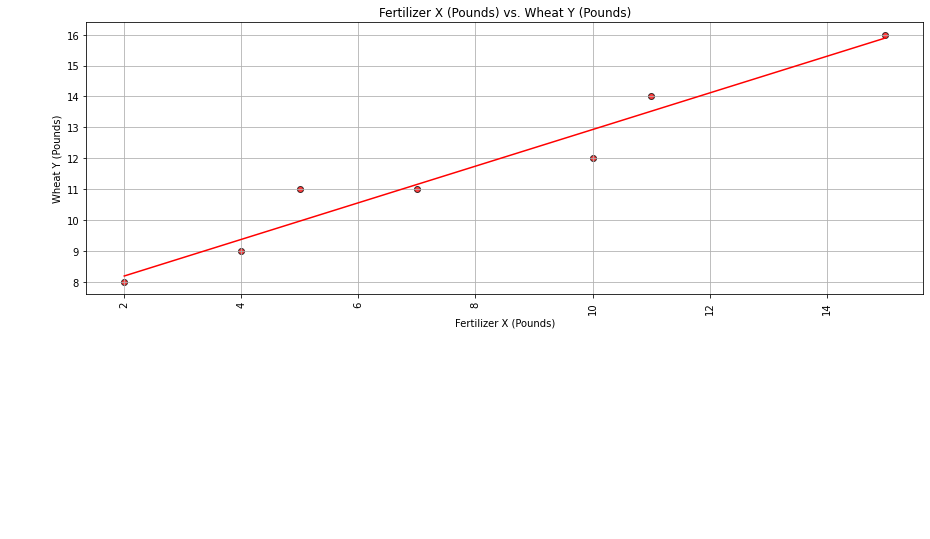

In [7]:

# Assign x_values, y_values
x_values = biostatistic_df["Fertilizer X (Pounds)"]
y_values = biostatistic_df["Wheat Y (Pounds)"]

plt.figure(figsize=(15,5))
plt.xticks(rotation=90)

# Assign linregress values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Assign line equation values
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"

# Generate a scatter plot of US COVID 19 cases versus Population
plt.scatter(x_values, y_values,
    marker='o',
    facecolors='dodgerblue',
    edgecolors='black',
    c='red',
    alpha=.75)

# Plot regression line
plt.plot(x_values, regress_values, "r-")

# Annotate line equation
plt.annotate(line_eq, (0,0), fontsize=15, color="blue")

# Print r-squared value
print(f"The r-value is: {rvalue}")

# Print equation of the regression line
print(f"The equation of the regression line is: {line_eq}")

# Assign title, x label, and y label for our chart
plt.title(f"Fertilizer X (Pounds) vs. Wheat Y (Pounds)")
plt.xlabel("Fertilizer X (Pounds)")
plt.ylabel("Wheat Y (Pounds)")
plt.grid()

# Save the figure
plt.savefig("../PyCovid19/images/FertilizerWheat.png")
plt.show()


In [ ]:
combined_students_read_average_df = pd.concat([grouped_series_students_9th_grade_read_score,
                                               grouped_series_students_10th_grade_read_score,
                                               grouped_series_students_11th_grade_read_score,
                                               grouped_series_students_12th_grade_read_score],
                                               axis=1)

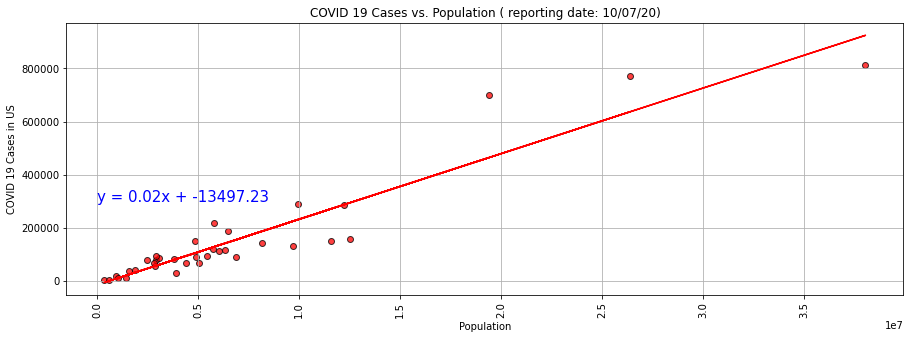

In [48]:



# Assign x_values, y_values
x_values = complete_data_us_population_df["Population"]
y_values = complete_data_us_population_df["Cases"]

plt.figure(figsize=(15,5))
plt.xticks(rotation=90)

# Assign linregress values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Assign line equation values
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"

# Generate a scatter plot of US COVID 19 cases versus Population
plt.scatter(x_values, y_values,
    marker='o',
    facecolors='dodgerblue',
    edgecolors='black',
    c='red',
    alpha=.75)

# Plot regression line
plt.plot(x_values, regress_values, "r-")

# Annotate line equation
plt.annotate(line_eq, (10000,300000), fontsize=15, color="blue")

# Print r-squared value
#print(f"The r-value is: {rvalue}")

# Print equation of the regression line
#print(f"The equation of the regression line is: {line_eq}")

# Assign title, x label, and y label for our chart
plt.title(f"COVID 19 Cases vs. Population ( reporting date: " + str(reporting_date) + ")")
plt.xlabel("Population")
plt.ylabel("COVID 19 Cases in US")
plt.grid()

# Save the figure
plt.savefig("../PyCovid19/images/COVID19CasesPopulation.png")
plt.show()


In [49]:
# Calculate the correlation coefficient and linear regression model 
# for cases and population
correlation = st.pearsonr(complete_data_us_population_df["Per Capita Income"],
                          complete_data_us_population_df["Cases"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.02


The r-value is: -0.023532781195866874
The equation of the regression line is: y = -1.29x + 191870.18


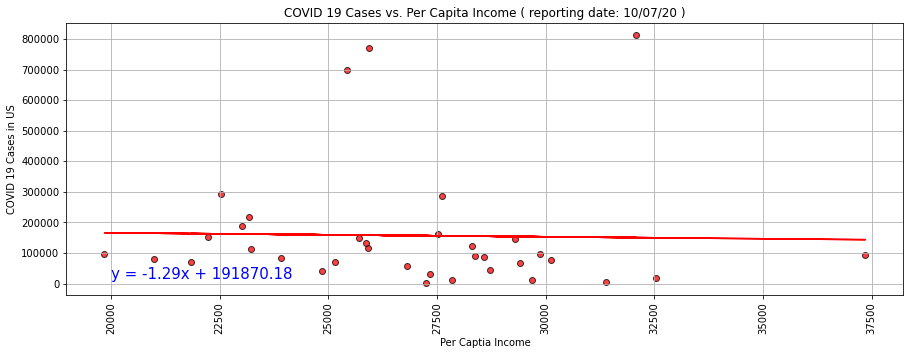

In [50]:
# General population 
complete_data_us_per_capita_df = complete_data_us_state_df

# Assign x_values, y_values
x_values = complete_data_us_per_capita_df["Per Capita Income"]
y_values = complete_data_us_per_capita_df["Cases"]

plt.figure(figsize=(15,5))
plt.xticks(rotation=90)

# Assign linregress values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Assign line equation values
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"

# Generate a scatter plot of US COVID 19 cases versus Population
plt.scatter(x_values, y_values,
    marker='o',
    facecolors='dodgerblue',
    edgecolors='black',
    c='red',
    alpha=.75)

# Plot regression line
plt.plot(x_values, regress_values, "r-")

# Annotate line equation
plt.annotate(line_eq, (20000,15000), fontsize=15, color="blue")

# Print r-squared value
print(f"The r-value is: {rvalue}")

# Print equation of the regression line
print(f"The equation of the regression line is: {line_eq}")

# Assign title, x label, and y label for our chart
plt.title(f"COVID 19 Cases vs. Per Capita Income ( reporting date: " + str(reporting_date) + " )")
plt.xlabel("Per Captia Income")
plt.ylabel("COVID 19 Cases in US")
plt.grid()

# Save the figure
plt.savefig("../PyCovid19/images/COVID19CasesPerCapitaIncome.png")
plt.show()


In [51]:
# Sort and display the five best states

bottom_five_states_df = complete_data_us_state_df.sort_values(by="Cases", ascending = True).iloc[:5,:]

# Set data frame index name to None

bottom_five_states_df.index.name = None

bottom_five_states_df["Cases"] = bottom_five_states_df["Cases"].astype(float)
bottom_five_states_df["Cases"] = bottom_five_states_df["Cases"].apply(np.floor)
bottom_five_states_df["Morbidity"] = bottom_five_states_df["Morbidity"].astype(float)
bottom_five_states_df["Morbidity"] = bottom_five_states_df["Morbidity"].apply(np.floor)
bottom_five_states_df["Population"] = bottom_five_states_df["Population"].astype(float)
bottom_five_states_df["Population"] = bottom_five_states_df["Population"].apply(np.floor)
bottom_five_states_df["Household Income"] = bottom_five_states_df["Household Income"].astype(float)
bottom_five_states_df["Household Income"] = bottom_five_states_df["Household Income"].apply(np.floor)
#complete_data_us_state_df["Population"] = complete_data_us_state_df["Population"].map("{:.0f}".format)
bottom_five_states_df["Median Age"] = bottom_five_states_df["Median Age"].astype(float)
bottom_five_states_df["Median Age"] = bottom_five_states_df["Median Age"].apply(np.floor)
bottom_five_states_df["Per Capita Income"] = bottom_five_states_df["Per Capita Income"].astype(float)
bottom_five_states_df["Per Capita Income"] = bottom_five_states_df["Per Capita Income"].apply(np.floor)
bottom_five_states_df["Poverty Count"] = bottom_five_states_df["Poverty Count"].apply(np.floor)


# Display to output
bottom_five_states_df

,State,Cases,Morbidity,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
1,Alaska,3419.0,17.0,369593.0,36.0,57749.0,27253.0,41488.0,17.097559
34,Wyoming,5633.0,50.0,577564.0,43.0,63032.0,31382.0,62956.0,10.390838
21,Montana,12126.0,173.0,1024037.0,46.0,48800.0,27854.0,142827.0,13.702821
9,Hawaii,12264.0,131.0,1413827.0,41.0,65967.0,29688.0,142959.0,12.466646
6,Delaware,19771.0,633.0,937510.0,42.0,63635.0,32544.0,111160.0,11.964857


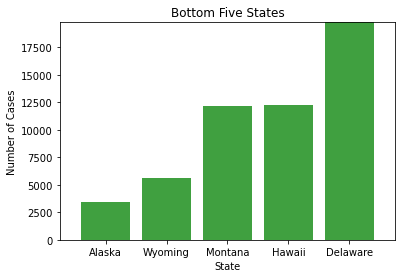

In [52]:
# Bar Graph Bottom Five States
cases = bottom_five_states_df["Cases"].to_list()
states = bottom_five_states_df["State"].to_list()
x_axis = np.arange(len(states))
plt.bar(x_axis, cases, color='g', alpha=0.75, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, states)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(cases)+5)
plt.title("Bottom Five States")
plt.xlabel("State")
plt.ylabel("Number of Cases")
# Save the figure
plt.savefig("../PyCovid19/images/BarBottomFiveStates.png")
plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

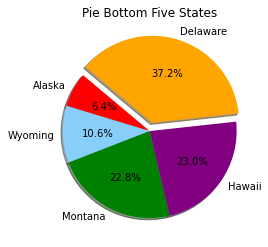

In [53]:
# Pie Chart Bottom Five States
# Labels for the sections of our pie chart
labels = states
# The values of each section of the pie chart
sizes = cases
# The colors of each section of the pie chart
colors = ["red","lightskyblue", "green", "purple","orange"]
explode = [0, 0, 0, 0, 0.1]
plt.pie(sizes,explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Pie Bottom Five States')
plt.savefig("../PyCovid19/images/PieBottomFiveStates.png")
plt.show

The r-value is: 0.17929180446926046
The equation of the regression line is: y = 0.01x + 2.65


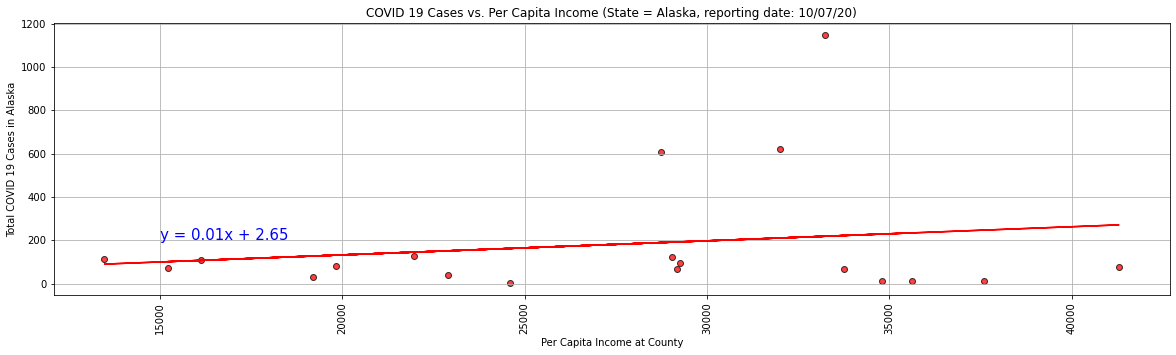

In [61]:
# Change State to Bottom State
complete_data_us_bottom_state_df = complete_data_us_county_df[complete_data_us_county_df["State"] == "Alaska"]
x = complete_data_us_bottom_state_df["Per Capita Income"]
y = complete_data_us_bottom_state_df["Cases"]
# Assign linregress values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

# Assign line equation values
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"

plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
# Generate a scatter plot of US COVID 19 cases versus Max Temperature
plt.scatter(x, y,
    marker='o',
    facecolors='dodgerblue',
    edgecolors='black',
    c='red',
    alpha=.75)

# Plot regression line
plt.plot(x, regress_values, "r-")

# Annotate line equation
plt.annotate(line_eq, (15000,200), fontsize=15, color="blue")


# Print r-squared value
print(f"The r-value is: {rvalue}")

# Print equation of the regression line
print(f"The equation of the regression line is: {line_eq}")


# Assign title, x label, and y label for our chart
plt.title(f"COVID 19 Cases vs. Per Capita Income (State = Alaska, reporting date: " + str(reporting_date) + ")")
plt.xlabel("Per Capita Income at County")
plt.ylabel("Total COVID 19 Cases in Alaska")
plt.grid()
# Save the figure
plt.savefig("../PyCovid19/images/COVID19CasesPerCaptiaIncomeAlaska.png")
plt.show()

The r-value is: 0.9358688940092466
The equation of the regression line is: y = 0.01x + 7.36


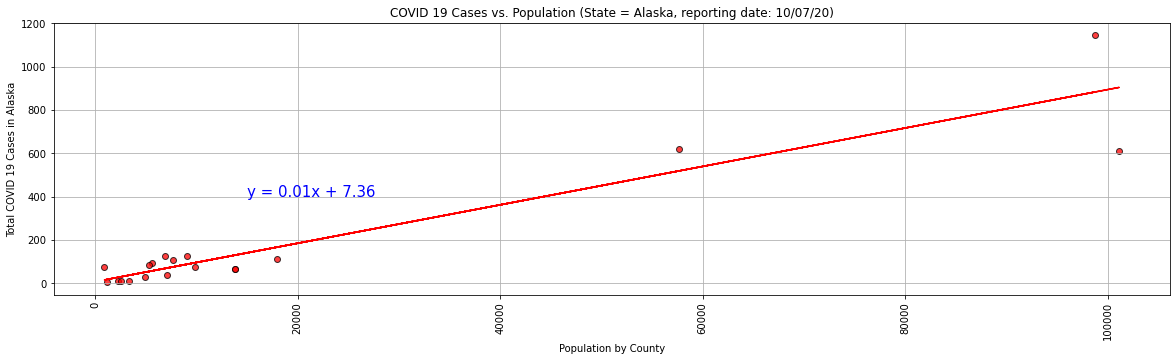

In [62]:
# Change State to Bottom State
x = complete_data_us_bottom_state_df["Population"]
y = complete_data_us_bottom_state_df["Cases"]
# Assign linregress values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

# Assign line equation values
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"

plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
# Generate a scatter plot of US COVID 19 cases versus Max Temperature
plt.scatter(x, y,
    marker='o',
    facecolors='dodgerblue',
    edgecolors='black',
    c='red',
    alpha=.75)

# Plot regression line
plt.plot(x, regress_values, "r-")

# Annotate line equation
plt.annotate(line_eq, (15000,400), fontsize=15, color="blue")


# Print r-squared value
print(f"The r-value is: {rvalue}")

# Print equation of the regression line
print(f"The equation of the regression line is: {line_eq}")


# Assign title, x label, and y label for our chart
plt.title(f"COVID 19 Cases vs. Population (State = Alaska, reporting date: " + str(reporting_date) + ")")
plt.xlabel("Population by County")
plt.ylabel("Total COVID 19 Cases in Alaska")
plt.grid()
# Save the figure
plt.savefig("../PyCovid19/images/COVID19CasesPopulationAlaska.png")
plt.show()

In [55]:
complete_data_us_state_df[complete_data_us_state_df["State"] == "New york"]

,State,Cases,Morbidity,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate


In [49]:
# Sort and display the five worst states

top_five_states_df = complete_data_us_state_df.sort_values(by="Cases", ascending = False).iloc[:5,:]

# Set data frame index name to None

top_five_states_df.index.name = None

# Display to output
top_five_states_df


top_five_states_df["Cases"] = top_five_states_df["Cases"].astype(float)
top_five_states_df["Cases"] = top_five_states_df["Cases"].apply(np.floor)
top_five_states_df["Morbidity"] = top_five_states_df["Morbidity"].astype(float)
top_five_states_df["Morbidity"] = top_five_states_df["Morbidity"].apply(np.floor)
top_five_states_df["Population"] = top_five_states_df["Population"].astype(float)
top_five_states_df["Population"] = top_five_states_df["Population"].apply(np.floor)
top_five_states_df["Household Income"] = top_five_states_df["Household Income"].astype(float)
top_five_states_df["Household Income"] = top_five_states_df["Household Income"].apply(np.floor)
#complete_data_us_state_df["Population"] = complete_data_us_state_df["Population"].map("{:.0f}".format)
top_five_states_df["Median Age"] = top_five_states_df["Median Age"].astype(float)
top_five_states_df["Median Age"] = top_five_states_df["Median Age"].apply(np.floor)
top_five_states_df["Per Capita Income"] = top_five_states_df["Per Capita Income"].astype(float)
top_five_states_df["Per Capita Income"] = top_five_states_df["Per Capita Income"].apply(np.floor)
top_five_states_df["Poverty Count"] = top_five_states_df["Poverty Count"].apply(np.floor)

top_five_states_df

,State,Cases,Morbidity,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
4,California,811698.0,15608.0,38019919.0,43.0,62474.0,32090.0,5671248.0,15.199278
29,Texas,770539.0,15831.0,26396239.0,40.0,51721.0,25932.0,4137793.0,15.017743
7,Florida,698869.0,14031.0,19377948.0,44.0,47546.0,25435.0,2976103.0,16.726199
8,Georgia,291911.0,6613.0,9925501.0,40.0,44625.0,22524.0,1627391.0,19.170122
11,Illinois,287143.0,8562.0,12234955.0,43.0,55137.0,27628.0,1650570.0,12.434117


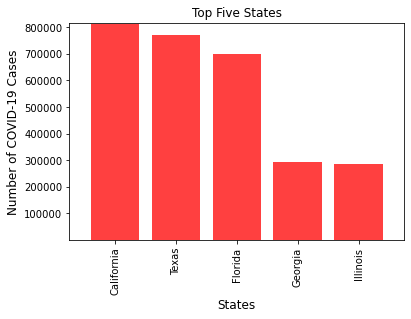

In [50]:
# Bar graph for top 5 states and case count
top_states_case_count = top_five_states_df["Cases"].to_list()
top_states = top_five_states_df["State"].to_list()
x_axis = np.arange(len(top_states_case_count))
plt.bar(x_axis, top_states_case_count, color='r', alpha=0.75, align="center")
ticks = [value for value in x_axis]
#plt.figure(figsize=(20,5))
plt.xticks(ticks, top_states, rotation=90)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(1.0, max(top_states_case_count) + 5000)
plt.title('Top Five States')
plt.ylabel('Number of COVID-19 Cases', fontsize=12)
plt.xlabel('States', fontsize=12)
# Save the figure
plt.savefig("../PyCovid19/images/BarTopFiveStates.png")
plt.show()


The r-value is: 0.07122036152310528
The equation of the regression line is: y = 0.24x + 6410.32


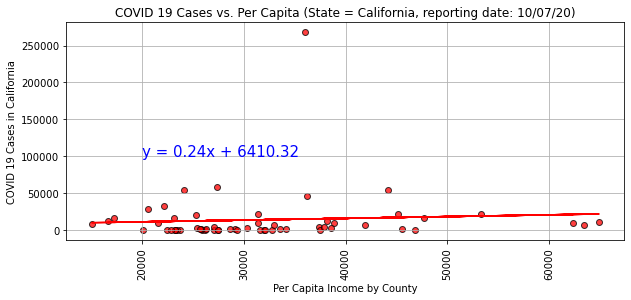

In [69]:
# Change State to Top State
complete_data_us_top_state_df = complete_data_us_county_df[complete_data_us_county_df["State"] == "California"]
x = complete_data_us_top_state_df["Per Capita Income"]
y = complete_data_us_top_state_df["Cases"]

# Assign linregress values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

# Assign line equation values
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"

plt.figure(figsize=(10,4))
plt.xticks(rotation=90)
# Generate a scatter plot of US COVID 19 cases versus Max Temperature
plt.scatter(x, y,
    marker='o',
    facecolors='dodgerblue',
    edgecolors='black',
    c='red',
    alpha=.75)

# Plot regression line
plt.plot(x, regress_values, "r-")

# Annotate line equation
plt.annotate(line_eq, (20000,100000), fontsize=15, color="blue")

# Print r-squared value
print(f"The r-value is: {rvalue}")

# Print equation of the regression line
print(f"The equation of the regression line is: {line_eq}")

# Assign title, x label, and y label for our chart
plt.title(f"COVID 19 Cases vs. Per Capita (State = California, reporting date: " + str(reporting_date) + ")")
plt.xlabel("Per Capita Income by County")
plt.ylabel("COVID 19 Cases in California")
plt.grid()
# Save the figure
plt.savefig("../PyCovid19/images/COVID19CasesPerCapitaIncomeCalifornia.png")
plt.show()

The r-value is: 0.9773071563299146
The equation of the regression line is: y = 0.02x + -2308.56


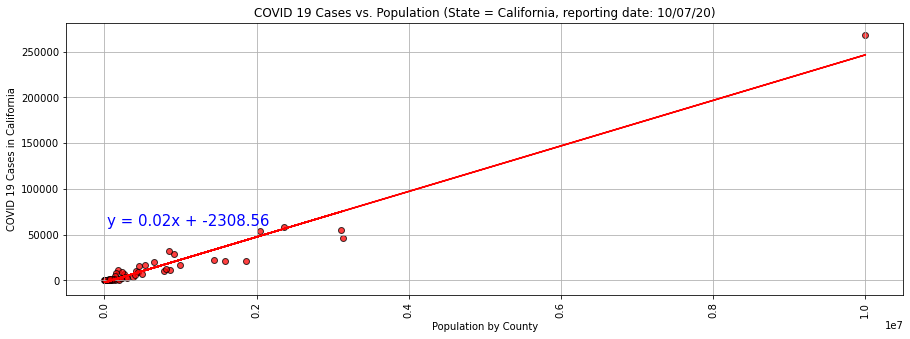

In [70]:
# Change State to Top State
complete_data_us_top_state_df = complete_data_us_county_df[complete_data_us_county_df["State"] == "California"]
x = complete_data_us_top_state_df["Population"]
y = complete_data_us_top_state_df["Cases"]

# Assign linregress values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

# Assign line equation values
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"

plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
# Generate a scatter plot of US COVID 19 cases versus Max Temperature
plt.scatter(x, y,
    marker='o',
    facecolors='dodgerblue',
    edgecolors='black',
    c='red',
    alpha=.75)

# Plot regression line
plt.plot(x, regress_values, "r-")

# Annotate line equation
plt.annotate(line_eq, (40000,60000), fontsize=15, color="blue")

# Print r-squared value
print(f"The r-value is: {rvalue}")

# Print equation of the regression line
print(f"The equation of the regression line is: {line_eq}")

# Assign title, x label, and y label for our chart
plt.title(f"COVID 19 Cases vs. Population (State = California, reporting date: " + str(reporting_date) + ")")
plt.xlabel("Population by County")
plt.ylabel("COVID 19 Cases in California")
plt.grid()
# Save the figure
plt.savefig("../PyCovid19/images/COVID19CasesPopulationCalifornia.png")
plt.show()

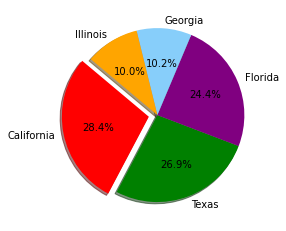

In [52]:
# Pie chart for top 5 states and case count
labels = top_states
sizes = top_states_case_count
colors = ["red", "green", "purple", "lightskyblue", "orange"]
explode = (0.1, 0, 0, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Save the figure
plt.savefig("../PyCovid19/images/PieTopFiveStates.png")
plt.show()